## Notebook for building very simple forecasting models to predict future prices of cryptocurrency. Historical data can be found on [www.investing.com](https://www.investing.com/crypto) This example base on the Bitcoin data.

In [1]:
from datetime import datetime
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading Bitcoin's historical data

In [2]:
raw_df = pd.read_csv('datasets/BitcoinHistoricalData.csv', parse_dates=['Date'], date_parser=lambda dates: datetime.strptime(dates, '%b %d, %Y'))
raw_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-03-31,"45,937.0","47,071.0","47,624.0","45,620.0",516.59M,-2.42%
1,2022-03-30,"47,075.0","47,449.0","47,714.0","46,601.0",467.76M,-0.79%
2,2022-03-29,"47,449.0","47,126.0","48,127.0","47,029.0",478.82M,0.73%
3,2022-03-28,"47,105.0","46,859.0","48,199.0","46,672.0",610.27M,0.52%
4,2022-03-27,"46,859.0","44,542.0","46,947.0","44,445.0",388.79M,5.19%


### Data cleansing

In [3]:
df = raw_df.drop(['Vol.', 'Change %'], axis=1)
columns_to_convert = list(df.columns)
columns_to_convert.remove('Date')
for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '')
df = df.astype({'Price': 'float', 'Open': 'float', 'High': 'float', 'Low': 'float'})
df.head()

,Date,Price,Open,High,Low
0,2022-03-31,45937.0,47071.0,47624.0,45620.0
1,2022-03-30,47075.0,47449.0,47714.0,46601.0
2,2022-03-29,47449.0,47126.0,48127.0,47029.0
3,2022-03-28,47105.0,46859.0,48199.0,46672.0
4,2022-03-27,46859.0,44542.0,46947.0,44445.0


In [4]:
close_price_to_predict_on = df[['Date', 'Price']]
new_names = {
    "Date": "ds",
    "Price": "y",
}
close_price_to_predict_on = close_price_to_predict_on.rename(columns=new_names)
close_price_to_predict_on.head()

,ds,y
0,2022-03-31,45937.0
1,2022-03-30,47075.0
2,2022-03-29,47449.0
3,2022-03-28,47105.0
4,2022-03-27,46859.0


### Building model and predicting values for next year

In [5]:
model = Prophet(seasonality_mode="multiplicative", daily_seasonality=True)
model.fit(close_price_to_predict_on)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

Initial log joint probability = -167.768
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9256.78    0.00828326       790.883           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9417.03    0.00772678       450.106           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9492.36     0.0117521       838.227           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9551.99   0.000448335       266.188      0.2886      0.9931      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9591.14    0.00431451       750.878           1           1      608   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [6]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
4635,2023-03-27,8234.212598,75227.893353,101493.675234,7036.132517,9353.864163,9.145069,9.145069,9.145069,9.794001,...,0.015366,0.015366,0.015366,0.633566,0.633566,0.633566,0.0,0.0,0.0,88880.098476
4636,2023-03-28,8240.865719,76775.207786,104234.337746,7039.187644,9370.862756,9.145069,9.145069,9.145069,10.031659,...,-0.003970,-0.003970,-0.003970,0.890559,0.890559,0.890559,0.0,0.0,0.0,90910.419525
4637,2023-03-29,8247.518840,79252.128935,107125.173915,7042.242770,9386.147188,9.145069,9.145069,9.145069,10.315564,...,0.012598,0.012598,0.012598,1.157896,1.157896,1.157896,0.0,0.0,0.0,93325.323711
4638,2023-03-30,8254.171960,80395.022115,109344.516120,7043.190840,9398.845184,9.145069,9.145069,9.145069,10.515707,...,-0.062682,-0.062682,-0.062682,1.433321,1.433321,1.433321,0.0,0.0,0.0,95052.628172
4639,2023-03-31,8260.825081,83280.178989,112462.711379,7044.945621,9409.801859,9.145069,9.145069,9.145069,10.877054,...,0.017548,0.017548,0.017548,1.714437,1.714437,1.714437,0.0,0.0,0.0,98114.267263


In [7]:
close_price_to_predict_on = close_price_to_predict_on.set_index('ds')
close_price_to_predict_on = close_price_to_predict_on.iloc[::-1]

forecast = forecast[['ds', 'yhat']]
forecast = forecast.set_index('ds')

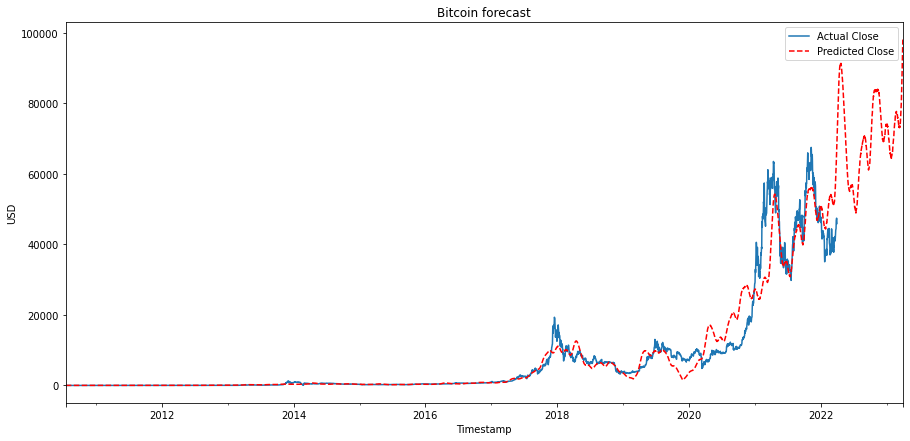

In [8]:
plt.figure(figsize=(15,7))
close_price_to_predict_on.y.plot(label='Actual Close')
forecast.yhat.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Bitcoin forecast')
plt.ylabel('USD')
plt.xlabel('Timestamp')
plt.show()

In [9]:
future_day = '2023-02-01'
forecast.rename(columns={'yhat': 'Close'}, inplace=True)
forecast.filter(items=[future_day], axis=0)

,Close
ds,
2023-02-01,66274.541925
